Exercise3: a pyroot scripts that reads the "mc_410000.ttbar_lep.exactly2lep.filtered.root" file we used above, applies a selection requiring at least one jet in the event with pT>50000 MeV and requires that the leading lepton (i.e. the one with the higest pt) passes TightID requirements (i.e. its variable lep_isTightID is 1). Produce a plot of the leading lepton pt, one of the leading jet pt, and use a 2D plot to study if these two variables are correlated. Write in output a tree containing just the leading lepton pt and type, and the jet pt and trueflavor for all the jets in the event. Also, the script must calculate efficiencies vs pt for the isTightID requirement, separetely for electrons and muons.

In [10]:
# Import libraries

%reset -f
from ROOT import *
from include import ROOTHelper, Helper
from array import array

In [11]:
# Read input files and create histos

FileIn = TFile.Open("mc_410000.ttbar_lep.exactly2lep.filtered.root", "READ")
TreeIn = FileIn.Get("mini")

entries = TreeIn.GetEntries()

hLep_pt   = TH1F("hLeading_lep_pt","Leading Lepton p_{T} ; Lepton p_{T} [GeV] ; N_{events}", 150 , 0, 200)
hJet_pt   = TH1F("hLeading_jet_pt","Leading Jet p_{T} ; Jet p_{T} [GeV] ; N_{events}", 150 , 50, 200)
hJetvsLep = TH2F("hJet_vs_Lep_pt"," Jet p_{T} vs Lep p_{T} ; Jet p_{T} [GeV] ; Lep p_{T} [GeV]", 150 , 0, 200, 150, 0, 200)

In [12]:
# Create output ROOT file called "OutputTree" and TTree 

FileOut = TFile.Open("OutputTree.root", "RECREATE")
TreeOut = TTree("NewMini", "NewMini")

# variables for the output tree
Newlep_pt       = array("f", [0.])
Newlep_type     = array("f", [0.])
Newjet_pt       = array("f", [0.])
Newjet_trueflav = array("f", [0.])

# branches in the output tree
TreeOut.Branch("Newlep_pt", Newlep_pt, "Newlep_pt/F")
TreeOut.Branch("Newlep_type", Newlep_type, "Newlep_type/F")
TreeOut.Branch("Newjet_pt", Newjet_pt, "Newjet_pt/F")
TreeOut.Branch("Newjet_trueflav", Newjet_trueflav, "Newjet_trueflav/F")

In [13]:
# Loop over the events in the treeIn
entry=0
for event in TreeIn:
  entry+=1
  if ((entry%5000)==0):
    print("reading entry %d out of %d" %(entry,entries))
  
  # Apply selection: at least one jet with pT > 50000 MeV
  jets_passing_pt = sum(pt > 50000 for pt in event.jet_pt)
  # print(jets_passing_pt)
  if jets_passing_pt < 1:
    continue    

  # Apply selection: leading lepton passes TightID requirements
  for i in event.lep_pt:
    leading_lepton_index = max(range(event.lep_pt.size()), key=lambda i: event.lep_pt[i])
  # print(event.lep_pt)
  leading_lepton_pt = event.lep_pt[leading_lepton_index]/1000
  # print(leading_lepton_pt)
  leading_lepton_type = event.lep_type[leading_lepton_index]

  if leading_lepton_pt <= 0 or leading_lepton_type not in [11, 13]:
    continue
  
  # Fill histograms
  hLep_pt.Fill(leading_lepton_pt)
  hJet_pt.Fill(event.jet_pt[0]/1000)
  hJetvsLep.Fill(event.jet_pt[0]/1000, leading_lepton_pt)
  
  # Fill output tree variables
  Newlep_pt[0] = leading_lepton_pt
  Newlep_type[0] = leading_lepton_type
  for jet_index in range(event.jet_pt.size()):
    Newjet_pt[0] = event.jet_pt[jet_index]
    Newjet_trueflav[0] = event.jet_trueflav[jet_index]

  # Fill the output tree
  TreeOut.Fill()

# Save the histograms and tree to the output file
FileOut.cd()
TreeOut.Write()

hLep_pt.Write()
hJet_pt.Write()
hJetvsLep.Write()

# FileOut.Close()

reading entry 5000 out of 100000
reading entry 10000 out of 100000
reading entry 15000 out of 100000
reading entry 20000 out of 100000
reading entry 25000 out of 100000
reading entry 30000 out of 100000
reading entry 35000 out of 100000
reading entry 40000 out of 100000
reading entry 45000 out of 100000
reading entry 50000 out of 100000
reading entry 55000 out of 100000
reading entry 60000 out of 100000
reading entry 65000 out of 100000
reading entry 70000 out of 100000
reading entry 75000 out of 100000
reading entry 80000 out of 100000
reading entry 85000 out of 100000
reading entry 90000 out of 100000
reading entry 95000 out of 100000
reading entry 100000 out of 100000


14590

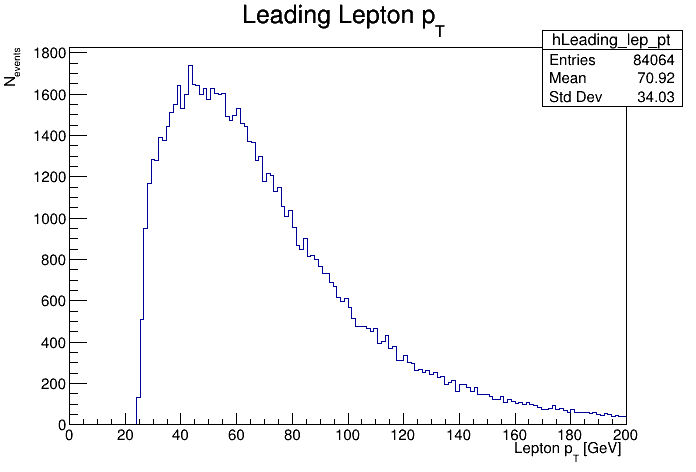

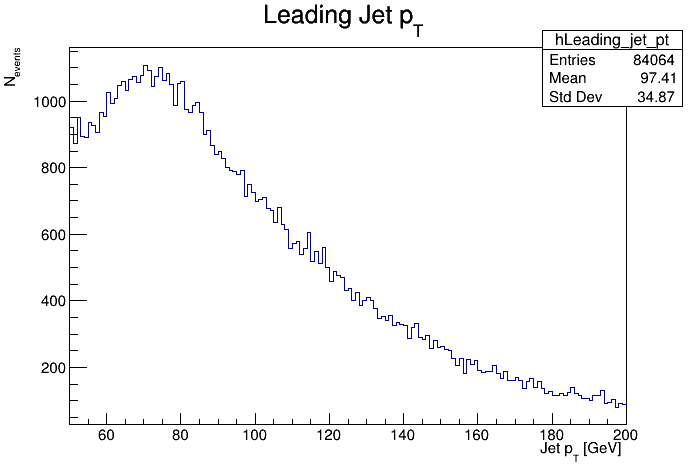

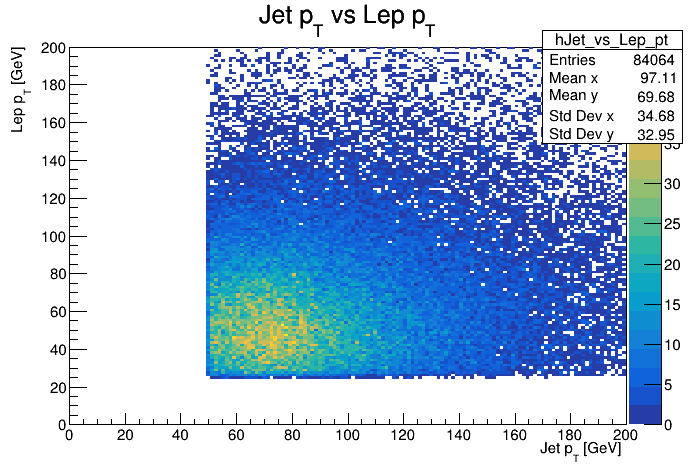

In [14]:
# Create canvas and Draw/save histograms on them
canvas_lep_pt = TCanvas()
canvas_lep_pt.Draw()
hLep_pt.Draw()
# canvas_lep_pt.SaveAs("hist_lep_pt.png")

canvas_jet_pt = TCanvas()
canvas_jet_pt.Draw()
hJet_pt.Draw()
# canvas_jet_pt.SaveAs("hist_jet_pt.png")

canvas_2d = TCanvas()
canvas_2d.Draw()
hJetvsLep.Draw("COLZ")
# canvas_2d.SaveAs("hist_2d.png")


In [15]:
# Calculate efficiencies vs pt for isTightID requirement - they are wrote in an output txt file
entry = 0
txtFile = open("LeptonEff.txt", "w")

for event in TreeIn:
  entry+=1
  if((entry%5000)==0):
    print("reading entry %d out of %d" %(entry,entries))
  
  if len(event.lep_pt)==0:
    continue
  for i in range (0, len(event.lep_pt)):
    if event.lep_type[i]==11 and event.lep_isTightID[i]==True:
      txtFile.write(str(event.lep_pt[i])+" "+str(1)+" electron\n")
    if event.lep_type[i]==11 and event.lep_isTightID[i] == False:
      txtFile.write(str(event.lep_pt[i])+" "+str(0)+" electron\n")
    
    if event.lep_type[i]==13 and event.lep_isTightID[i] == True:
      txtFile.write(str(event.lep_pt[i])+" "+str(1)+" muon\n")
    if event.lep_type[i]==13 and event.lep_isTightID[i] == False:
      txtFile.write(str(event.lep_pt[i])+" "+str(0)+" muon\n")



reading entry 5000 out of 100000
reading entry 10000 out of 100000
reading entry 15000 out of 100000
reading entry 20000 out of 100000
reading entry 25000 out of 100000
reading entry 30000 out of 100000
reading entry 35000 out of 100000
reading entry 40000 out of 100000
reading entry 45000 out of 100000
reading entry 50000 out of 100000
reading entry 55000 out of 100000
reading entry 60000 out of 100000
reading entry 65000 out of 100000
reading entry 70000 out of 100000
reading entry 75000 out of 100000
reading entry 80000 out of 100000
reading entry 85000 out of 100000
reading entry 90000 out of 100000
reading entry 95000 out of 100000
reading entry 100000 out of 100000


0

Error in <TFile::WriteTObject>: Directory OutputTree.root is not writable
Error in <TFile::WriteTObject>: Directory OutputTree.root is not writable


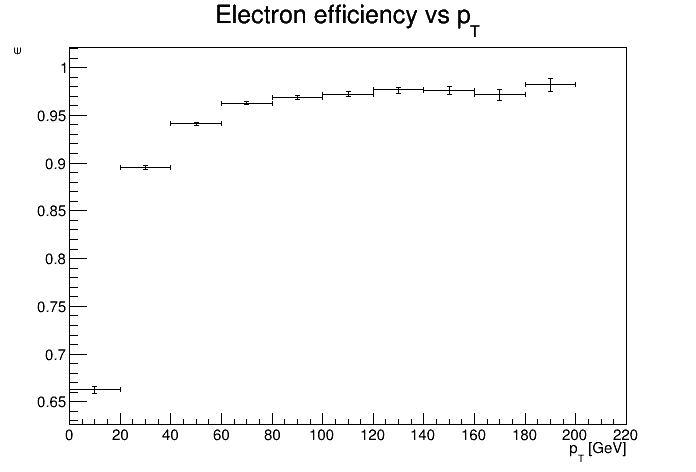

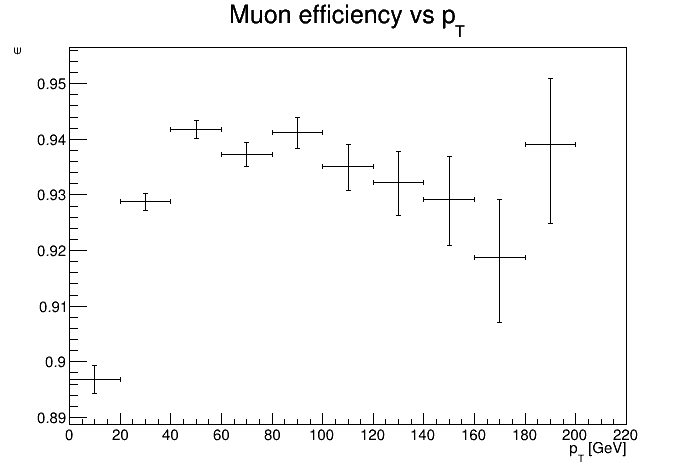

In [17]:
InFileTxt = open("LeptonEff.txt", "r")

elec_eff = TEfficiency("ElecEff_vs_pT","Electron efficiency vs p_{T}; p_{T} [GeV]; #epsilon", 10, 0, 200)
muon_eff = TEfficiency("MuonEff_vs_pT","Muon efficiency vs p_{T}; p_{T} [GeV]; #epsilon", 10, 0, 200)

for l in InFileTxt:
  elements=l.split()
  pt = float(elements[0])/1000.
  eff = (float(elements[1]) > 0.5)
  if elements[2]=="electron": 
    elec_eff.Fill(eff,pt)
  elif elements[2]=="muon": 
    muon_eff.Fill(eff,pt)


c1 = TCanvas()
c1.Draw()
elec_eff.Draw("AP")

c2=TCanvas()
c2.Draw()
muon_eff.Draw("AP")